Imports

In [ ]:
%load_ext autoreload
%autoreload 1

import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

from helper import get_data

Get the data

In [ ]:
symbol = 'MSFT'  # Feel free to change this to whichever stock you want to analyze

data = get_data(symbol=symbol)  # Get the data for the given stock as a DataFrame
data = data.sort_index()
data.head()

View the data

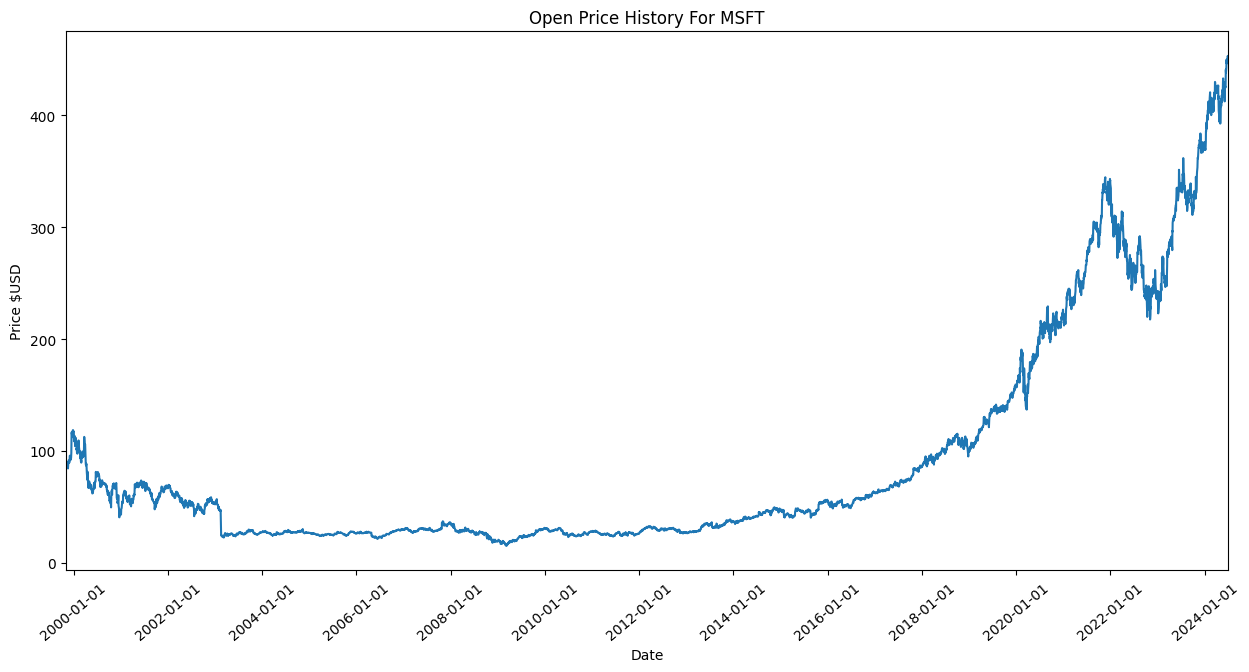

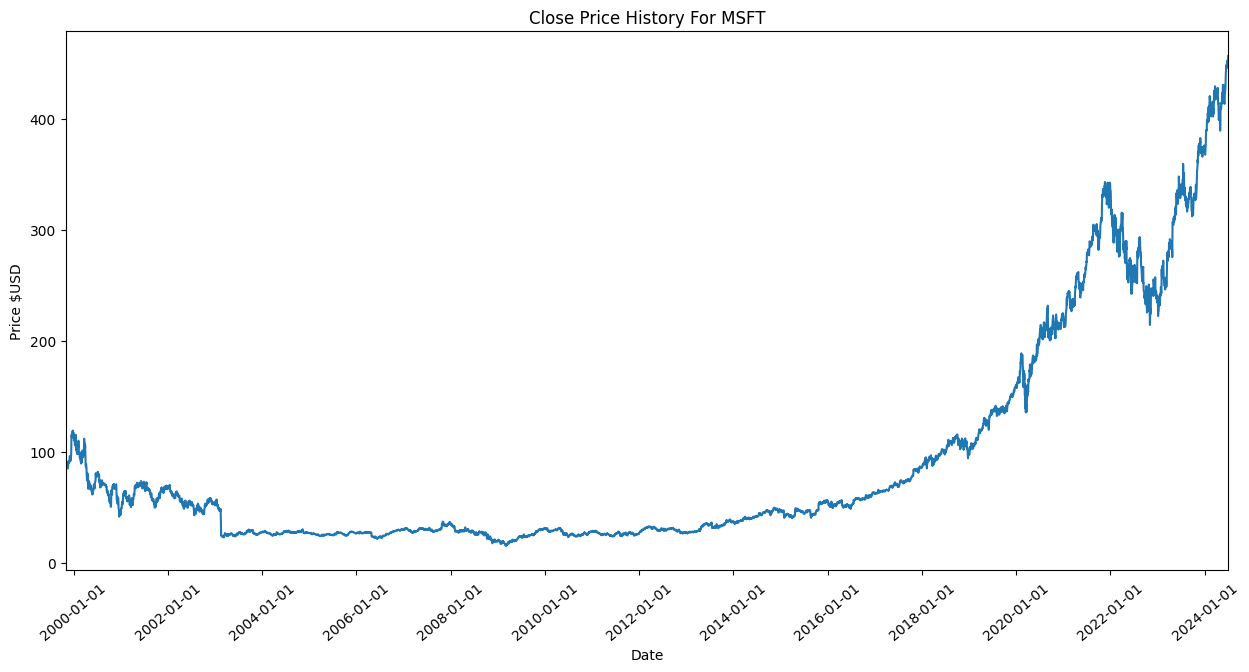

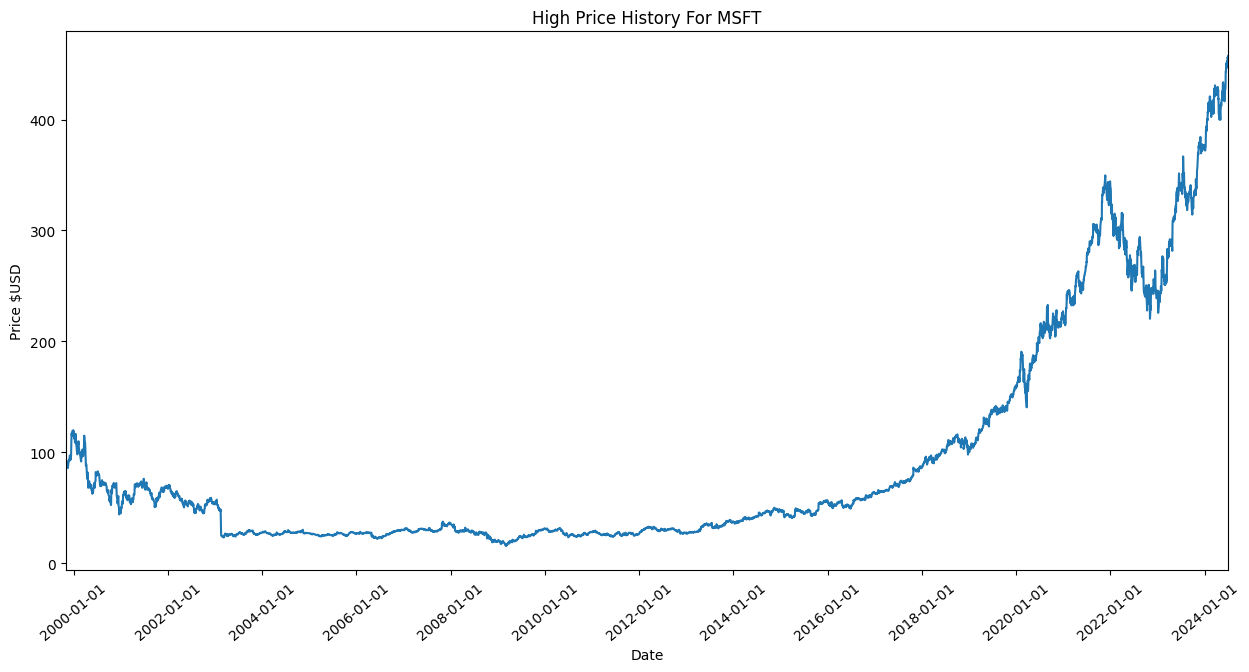

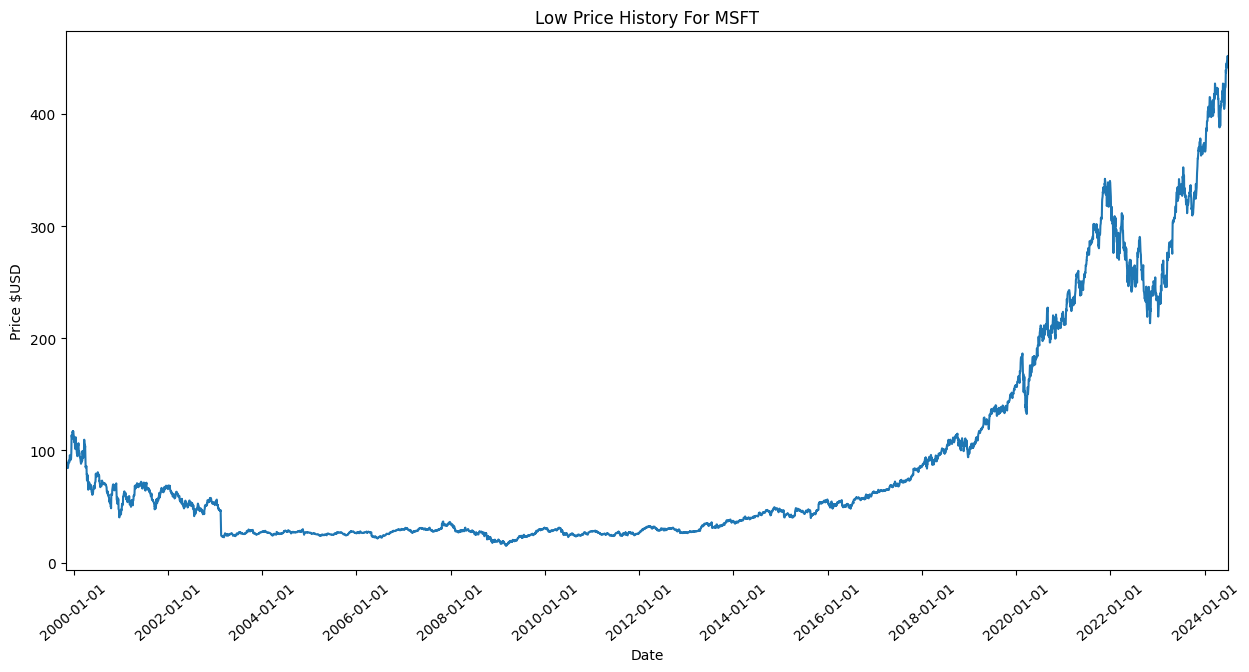

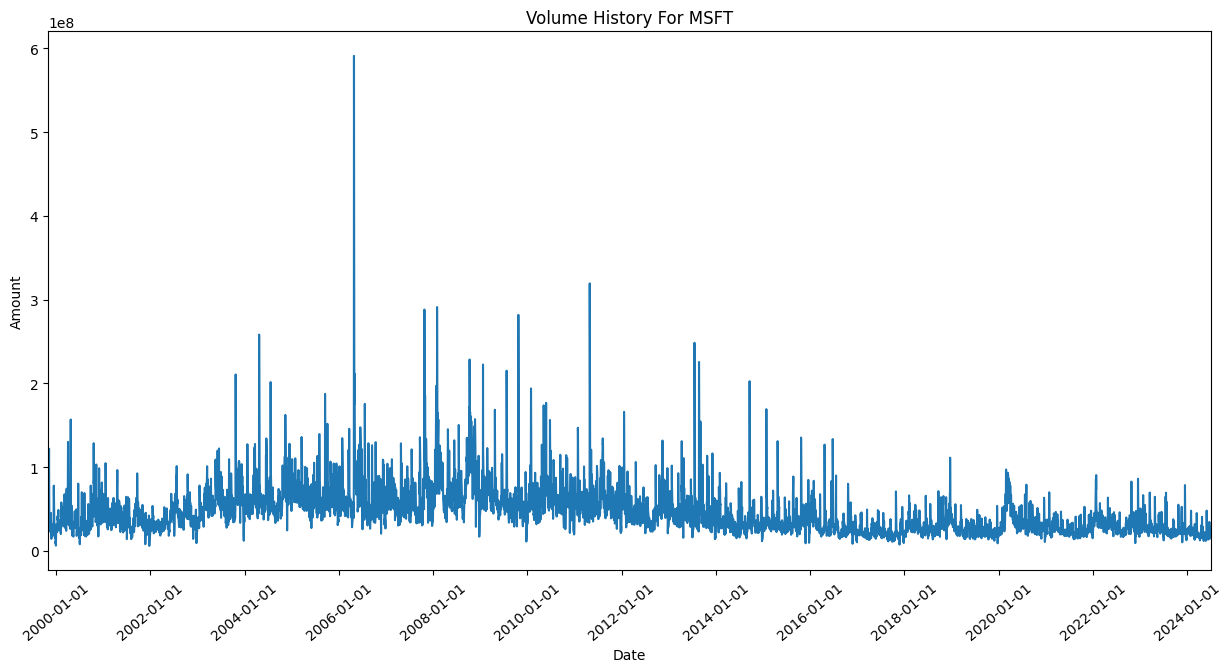

In [17]:
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['open'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Open Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['close'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Close Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['high'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'High Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['low'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Low Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['volume'])
plt.xlim([data.index.min(), data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title(f'Volume History For {symbol}')

plt.show()

View Last 30 Trading Days

DatetimeIndex(['2024-05-17', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24', '2024-05-28', '2024-05-29',
               '2024-05-30', '2024-05-31', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-06-06', '2024-06-07', '2024-06-10',
               '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14',
               '2024-06-17', '2024-06-18', '2024-06-20', '2024-06-21',
               '2024-06-24', '2024-06-25', '2024-06-26', '2024-06-27',
               '2024-06-28', '2024-07-01'],
              dtype='datetime64[ns]', name='timestamp', freq=None)


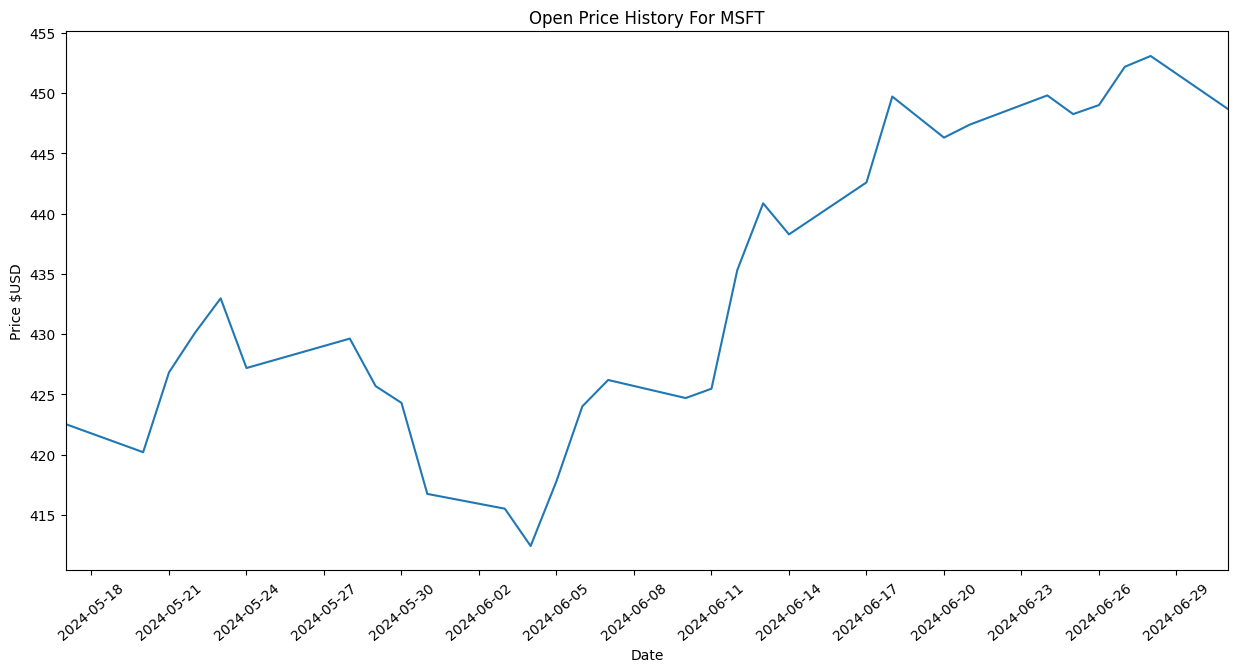

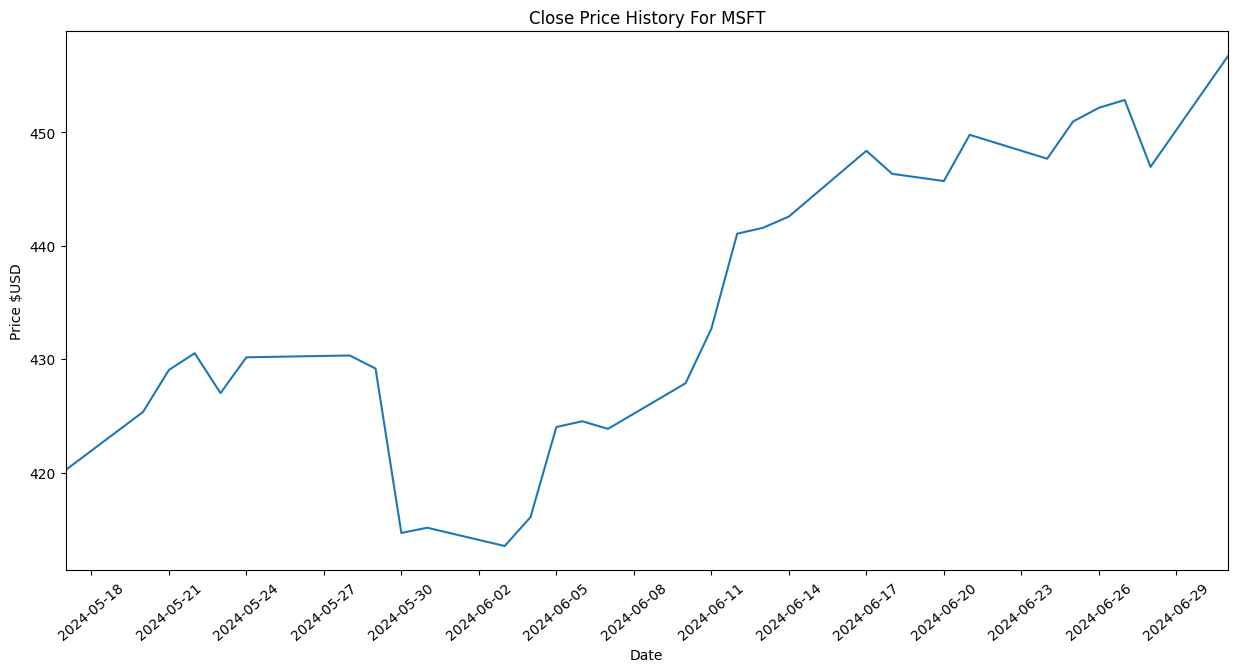

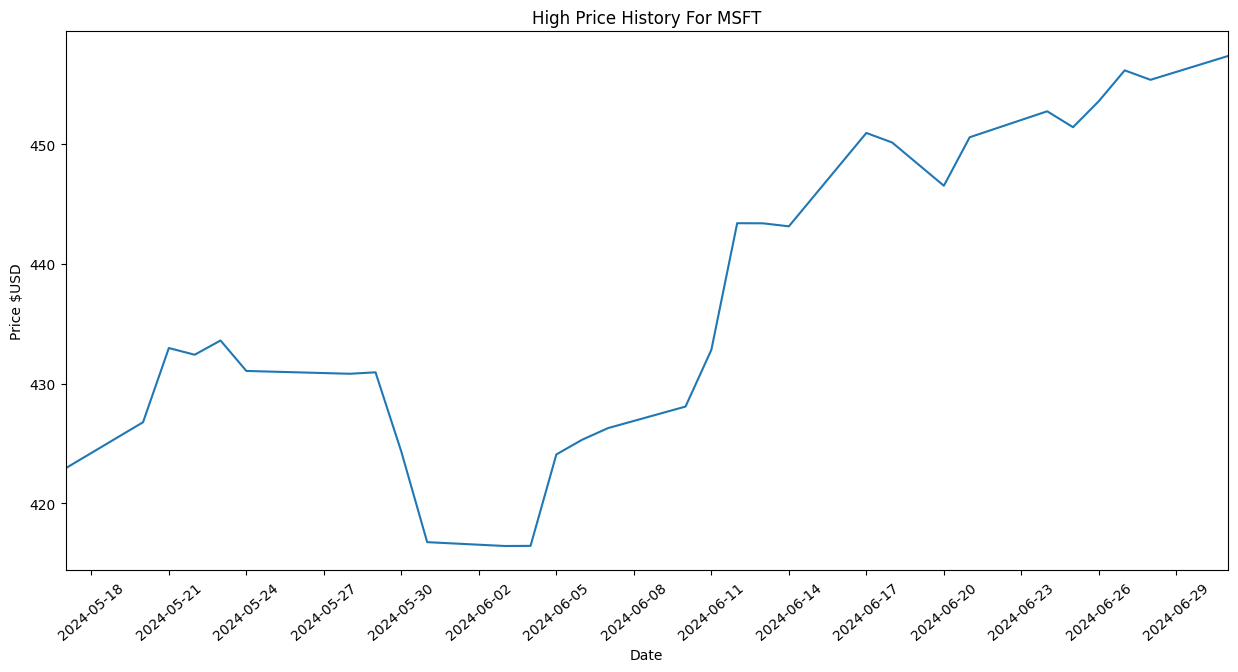

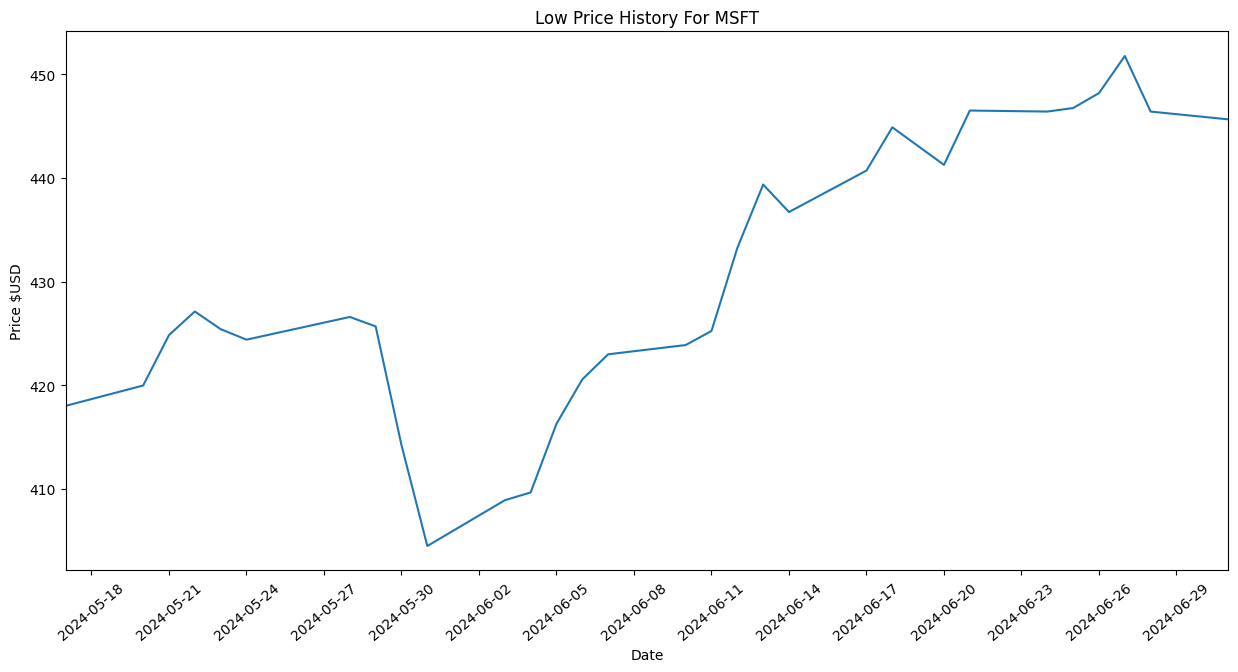

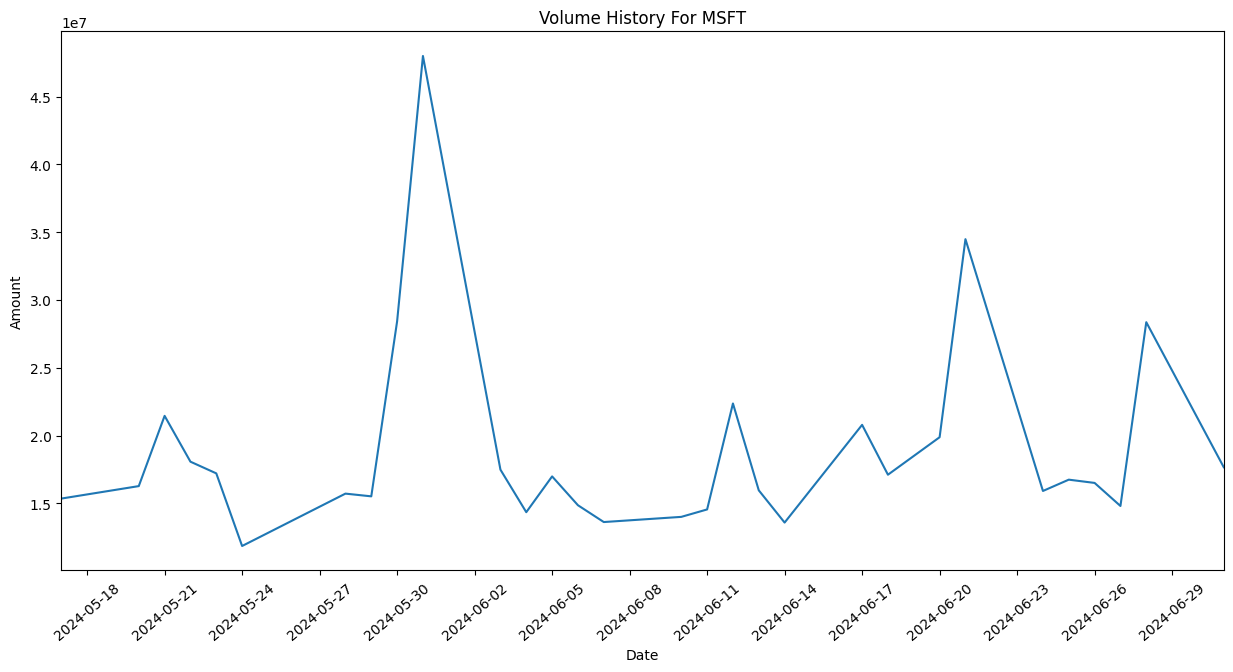

In [16]:
temp_data = data.iloc[-30:]

plt.figure(figsize=(15, 7))
plt.plot(temp_data.index, temp_data['open'])
plt.xlim([temp_data.index.min(), temp_data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Open Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(temp_data.index, temp_data['close'])
plt.xlim([temp_data.index.min(), temp_data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Close Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(temp_data.index, temp_data['high'])
plt.xlim([temp_data.index.min(), temp_data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'High Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(temp_data.index, temp_data['low'])
plt.xlim([temp_data.index.min(), temp_data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Price $USD')
plt.title(f'Low Price History For {symbol}')

plt.show()


plt.figure(figsize=(15, 7))
plt.plot(temp_data.index, temp_data['volume'])
plt.xlim([temp_data.index.min(), temp_data.index.max()])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Change interval as needed
plt.xticks(rotation=40)
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title(f'Volume History For {symbol}')

plt.show()

Prepare Data

Prepare the Model

Train the Model

Obtain and Plot Predictions